# 优化模块

scipy.optimize是SciPy中负责优化的子模块，这里介绍其三个主要功能：
- 最小二乘优化和曲线拟合。
- 无约束的优化。
- 方程求根。

In [1]:
import numpy as np

In [2]:
from matplotlib import pyplot as plt

## 多项式拟合

多项式拟合（Polynomial Curve-Fitting）用n阶多项式描述数据点(x,y)的关系。
多项式拟合的目的是找到一组系数，使得拟合得到的曲线与真实数据点之间的距离最小。

例如，考虑这样的一组数据：

In [3]:
x = np.linspace(-5, 5, 50)

In [4]:
y = 4 * x + 1.5

In [5]:
y_noise = y + np.random.randn(50) * 2

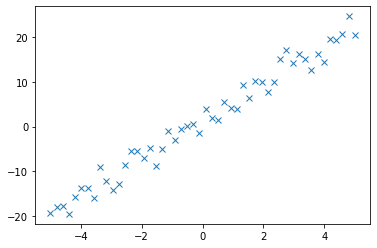

In [6]:
plt.plot(x, y_noise, "x")

拟合与插值不同，拟合不要求得到的曲线经过所有的数据点。

多项式拟合的系数可以使用NumPy模块的np.polyfit()函数来得到：

In [7]:
coeff = np.polyfit(x, y_noise, 1)

In [8]:
coeff

array([4.17438706, 1.35630552])

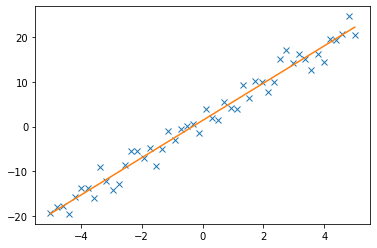

In [9]:
plt.plot(x, y_noise, "x", x, coeff[0] * x + coeff[1])

多项式函数还可以通过函数`np.ploy1d()`生成：

In [10]:
f = np.poly1d(coeff)

In [11]:
f

poly1d([4.17438706, 1.35630552])

In [12]:
print(f)

 
4.174 x + 1.356


生成的多项式对象支持数学运算得到新的多项式：

In [13]:
print(f ** 2 + 2+ f + 3)

       2
17.43 x + 15.5 x + 8.196


考虑更复杂的拟合：

In [14]:
x = np.linspace(0, np.pi * 2)

In [15]:
y = np.sin(x)

分别使用1阶，3阶和9阶多项式对这组数据进行拟合：

In [16]:
f1 = np.poly1d(np.polyfit(x, y, 1))

In [17]:
f3 = np.poly1d(np.polyfit(x, y, 3))

In [18]:
f9 = np.poly1d(np.polyfit(x, y, 9))

拟合曲线如下：

In [19]:
t = np.linspace(-3 * np.pi, 3 * np.pi, 200)

(-9.42477796076938, 9.42477796076938, -1.5, 1.5)

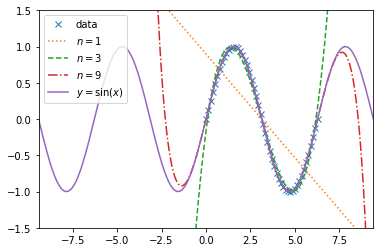

In [20]:
plt.plot(x, y, "x", 
         t, f1(t), ":", 
         t, f3(t), "--", 
         t, f9(t), "-.",
         t, np.sin(t)
        )
plt.legend(["data", r"$n=1$", r"$n=3$", r"$n=9$", r"$y=\sin(x)$"])
plt.axis([-3 * np.pi, 3 * np.pi, -1.5, 1.5])

最小二乘拟合：

In [21]:
from scipy import optimize

定义一个关于x的函数，该函数有四个额外参数：

In [22]:
def my_f(x, a, b, w, t):
    return a * np.exp(-b * np.sin(w * x + t)) 

生成一组带噪声的数据：

In [23]:
x = np.linspace(0, 2 * np.pi)

In [24]:
actual_parameters = [3, 2, 1.25, np.pi / 4]

In [25]:
y = my_f(x, *actual_parameters)

In [26]:
y_noise = y + 0.8 * np.random.randn(len(y))

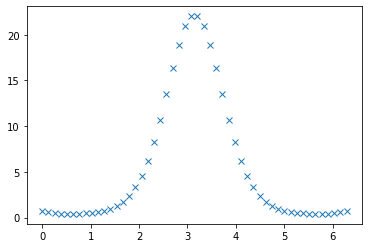

In [27]:
plt.plot(x, y, "x")

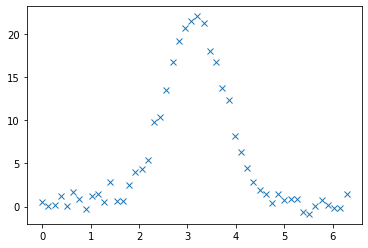

In [28]:
plt.plot(x, y_noise, "x")

最小二乘法（Least Squares）是一种优化技术，它通过最小化误差的平方和来寻找一个与数据匹配的最佳函数。

为了使用最小二乘法，需要先定义一个误差函数：

In [29]:
def err_f(p, x, y):
    return y - my_f(x, *p) 

第一个参数p是要估计的真实参数，第二个参数x是数据的输入，第三个参数y是输入对应的数据值。

利用该函数可以进行最小二乘估计：

In [30]:
c, rv = optimize.leastsq(err_f, [1,1,1,1], args=(x, y_noise))

找到最小二乘解时，rv返回1到4中的某个值，c返回找到的最小二乘估计：

In [31]:
c

array([2.73620073, 2.08882198, 1.20078322, 0.93881627])

In [32]:
rv

1

真实参数为：

In [33]:
actual_parameters

[3, 2, 1.25, 0.7853981633974483]

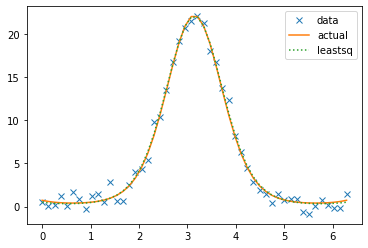

In [34]:
plt.plot(x, y_noise, "x", 
         x, y,
         x, my_f(x, *c), ":")
plt.legend(["data", "actual", "leastsq"])

也可以不定义误差函数，用函数`optimize.curve_fit()`直接对`my_f()`的参数进行拟合：

In [35]:
p_est, err_est = optimize.curve_fit(my_f, x, y_noise)

In [36]:
p_est

array([2.7362006 , 2.08882203, 1.20078321, 0.93881632])

## 最值优化：

物理上斜抛运动的水平距离公式为：

In [37]:
def fly_dist(theta, v0):
    g = 9.8
    theta_rad = np.pi * theta / 180.
    return v0 ** 2 / g * np.sin(2 * theta_rad) 

theta是采用度数进行衡量的，取值为0°到90°。v0是初始加速度。可以知道，在v0固定时，水平距离最大的角度是45°。

利用最小值优化函数`optimize.minimize()`可以得到这个结果。不过，为了获得最大值，首先要将最大值的问题转为求最小值的问题：

In [38]:
fly_dist_neg = lambda theta, v0: - fly_dist(theta, v0)

设定初始猜测为10°，并将初速度v0通过额外参数传入：

In [39]:
res = optimize.minimize(fly_dist_neg, 10, args=(1,))

In [40]:
res

      fun: -0.10204081529676719
 hess_inv: array([[8179.23375443]])
      jac: array([5.06639481e-07])
  message: 'Optimization terminated successfully.'
     nfev: 22
      nit: 4
     njev: 11
   status: 0
  success: True
        x: array([45.00406995])

In [41]:
res.x

array([45.00406995])

### 方程求根

考虑这样的一个函数：

In [42]:
func = lambda x: x + np.cos(x)

可以使用`optimize.root()`函数求这个函数为0的值：

In [43]:
sol = optimize.root(func, 0.3)

In [44]:
sol.x

array([-0.73908513])

In [45]:
sol.fun

array([1.11022302e-16])

`optimize.root()`函数还可以求解方程组：

In [46]:
func2 = lambda x: [x[0]*np.cos(x[1]) - 4, x[0]*x[1] - x[1] - 5]

In [47]:
sol = optimize.root(func, [1, 1])

In [48]:
sol.x

array([-0.73908513, -0.73908513])

In [49]:
sol.fun

array([-3.21964677e-15,  3.10862447e-15])